# Time Series Forecast with Prophet

## Introduction:
This is a simple kernel in which we will forecast stock prices using Prophet (Facebook's library for time series forecasting). However, historical prices are no indication whether a price will go up or down.  I'll rather use my own variables and use machine learning for stock price prediction rather than just using historical prices as an indication of stock price increase.


## A Summary about Prophet:
Facebook's research team has come up with an easier implementation of forecasting through it's new library called Prophet. From what I have read, the blog state's that analyst that can produce high quality forecasting data is rarely seen. This is one of the reasons why Facebook's research team came to an easily approachable way for using advanced concepts for time series forecasting and us Python users, can easily relate to this library since it uses Scikit-Learn's api (Similar to Scikit-Learn). To gain further information, you can look at  [Prophet Blog](https://research.fb.com/prophet-forecasting-at-scale/). Prophet's team main goal is to <b>to make it easier for experts and non-experts to make high quality forecasts that keep up with demand. </b> <br><br>

There are several characteristics of Prophet (you can see it in the blog) that I want to share with you Kaggles that shows where Prophet works best:
<ul>
<li>hourly, daily, or weekly observations with at least a few months (preferably a year) of history </li>
<li>strong multiple “human-scale” seasonalities: day of week and time of year </li>
<li>Important holidays that occur at irregular intervals that are known in advance (e.g. the Super Bowl) </li>
<li>A reasonable number of missing observations or large outliers </li>
<li>Historical trend changes, for instance due to product launches or logging changes </li>
<li>Trends that are non-linear growth curves, where a trend hits a natural limit or saturates </li>
</ul>
<br><br>

### How does Prophet Work?
---> In the process of Update.....


In [1]:
# Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from fbprophet import Prophet
# Statsmodels widely known for forecasting than Prophet
import statsmodels.api as sm
from scipy import stats
from pandas.core import datetools
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# plt.style.available
plt.style.use("seaborn-whitegrid")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipywidgets/widgets/widget.py:281: DeprecationWarning:

Widget registration using a string name has been deprecated. Widget registration now uses a plain `@register` decorator.



The following code snippet imports various libraries and sets up the environment for analysis.

Numpy and pandas are libraries used for numerical operations and data manipulation.

A static visualization can be created using matplotlib.pyplot and seaborn.

Date and time objects are handled by this library.

Facebook Prophet: This library is used for time series forecasting.

Various statistical models and tests can be performed using statsmodels.

The SciPy library is used for scientific computing, including statistical calculations.

Using plotly, you can create interactive visualizations.

Plotly is also initialized for offline use within a Jupyter Notebook, and any warnings encountered during subsequent code execution are suppressed.

Last but not least, the code sets the plotting style to "seaborn-whitegrid" using plt.style.use(). With this style, Matplotlib and Seaborn visualizations look clean and aesthetically pleasing.

In [2]:
df = pd.read_csv('../input/all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


This code snippet reads a CSV file named all_stocks_5yr.csv and stores it in a pandas DataFrame called df. The CSV file is assumed to be in the input folder of the parent directory.

PD.read_csv() reads the contents of a CSV file and converts it into a DataFrame, a table-like data structure that is easy to manipulate and analyze.

The head() function is called on df after the data is loaded into the DataFrame to display the first five rows. In this way, you can see the data structure and column names, as well as verify that the data has been loaded correctly.

In [3]:
# Brief Description of our dataset
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [4]:
# Replace the column name from name to ticks
df = df.rename(columns={'Name': 'Ticks'})

The following code snippet renames the 'Name' column in the DataFrame df to 'Ticks'. A DataFrame's column names can be modified using the rename() function. A dictionary is passed as an argument to the columns parameter, where the key represents the current column name and the value represents the new column name.

The dictionary {'Name': 'Ticks'} is used to change the 'Name' column to 'Ticks'. As a result of this operation, the original DataFrame is updated with the new column name.

Based on past stock prices, we will analyze Amazon's stock in this simple tutorial to see what the trend will look like for the near future.

In [5]:
# Let's analyze some of the stocks.
amzn = df.loc[df['Ticks'] == 'AMZN']
amzn.head()

,date,open,high,low,close,volume,Ticks
46387,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
46388,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
46389,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
46390,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
46391,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


Python code that analyzes data stored in a pandas DataFrame is provided by you.

This code creates a new variable called "amzn" and assigns it a DataFrame object containing only rows with tick values equal to 'AMZN' in the 'Ticks' column. Thus, it filters the original DataFrame (df) and creates a new DataFrame containing only Amazon stock data.

A DataFrame called "amzn" is displayed using the "head()" function in the second line. In Pandas, the "head()" method displays the first n rows of a DataFrame, where n is an optional argument. The first five rows will be displayed by default if no argument is passed.

This code is part of a larger analysis of stocks data and is specifically focused on isolating and analyzing Amazon stock data. Analysts can analyze and visualize the Amazon stock data separately from the rest of the stocks data by creating a new DataFrame.

We need to make sure if the date column is either a categorical type or a datetype. In our case date is a categorical datatype so we need to change it to datetime.

In [6]:
amzn.info() # Check whether the date is as object type or date type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 46387 to 47645
Data columns (total 7 columns):
date      1259 non-null object
open      1259 non-null float64
high      1259 non-null float64
low       1259 non-null float64
close     1259 non-null float64
volume    1259 non-null int64
Ticks     1259 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


Your code is also written in Python and analyzes data stored in a pandas DataFrame, specifically the Amazon stock DataFrame object created in the previous code snippet.

The first line of code calls the "info()" function on the "amzn" DataFrame. In Pandas, the "info()" method provides a summary of a DataFrame, including the number of entries, data type, and memory usage.

According to the output of the code, the "amzn" DataFrame has 1259 entries, which means that there are 1259 rows of Amazon stock data. A total of 7 columns make up the DataFrame: the date, the opening price, the high price, the low price, the closing price, the volume, and the ticker symbol ('Ticks').

Each column's data type is shown in the next section of the output. Ticks and date columns are listed as object types, meaning they are strings. As these columns were not explicitly set to datetime when the DataFrame was created, pandas defaulted to object. Float64 and int64 data types are listed for the other columns.

The last line of the output shows the DataFrame's memory usage, which is approximately 78.7 KB. When working with large datasets, this information is helpful for memory optimization.

This code provides an overview of the "amzn" DataFrame, including the data types of each column, the number of entries, and the amount of memory used. In addition, it indicates that the date column is stored as an object type, which may need to be converted to a datetime type for certain analysis or visualization purposes.

In [7]:
#  Change to dateformat
amzn.head()

,date,open,high,low,close,volume,Ticks
46387,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
46388,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
46389,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
46390,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
46391,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


You provided Python code that manipulates a pandas DataFrame object with Amazon stock data.

This code starts with a comment and does not execute any code.

In the second line of code, the "head()" function is called on the "amzn" DataFrame. Using the "head()" function in Pandas, you can display the first few rows of a DataFrame. The first five rows will be displayed by default if no argument is passed.

According to your comment, there may be some additional code between the two lines you provided, which changes the date format of the data in the "amzn" DataFrame. Because the comment indicates that the code is intended to change the date format, it suggests that the original DataFrame may have had a different format.

"head()" displays the first few rows of the "amzn" DataFrame after the date format has been changed (presumably in the omitted code). The analyst can quickly verify that the data is still displayed correctly after changing the date format.

The code snippet appears to be part of a larger analysis of Amazon stock data. In order to ensure that the data is in the correct format for further analysis and visualization, the analyst can change the date format and check the first few rows of the DataFrame.

In [8]:
# Create a copy to avoid the SettingWarning .loc issue 
amzn_df = amzn.copy()
# Change to datetime datatype.
amzn_df.loc[:, 'date'] = pd.to_datetime(amzn.loc[:,'date'], format="%Y/%m/%d")

You provided Python code that manipulates a pandas DataFrame object with Amazon stock data.

The first line of code creates a new DataFrame object called "amzn_df" and copies the "amzn" DataFrame using the "copy()" function. DataFrames are copied by the "copy()" function in order to avoid SettingWarning issues that may arise when modifying the original DataFrame. Due to the fact that the "amzn" DataFrame was created by filtering a larger DataFrame, modifying it directly may result in SettingWarning errors.

The second line of code converts the 'date' column in the "amzn_df" DataFrame to datetime format using the "pd.to_datetime()" function. Using the "loc" function, the "pd.to_datetime()" function is applied to the 'date' column of the "amzn_df" DataFrame. "pd.to_datetime()" converts a string representation of a date or time into a datetime format in pandas. This function uses the "format" parameter to specify the exact format of the date string, which is "%Y/%m/%d". The date string should be formatted as "YYYY/MM/DD".

By creating a new copy ("amzn_df") and changing the data type of the 'date' column to a datetime format, this code snippet modifies the "amzn" DataFrame. So, the analyst can avoid any SettingWarning issues and ensure that the data is in the correct format for further analysis and visualization.

In [9]:
amzn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 46387 to 47645
Data columns (total 7 columns):
date      1259 non-null datetime64[ns]
open      1259 non-null float64
high      1259 non-null float64
low       1259 non-null float64
close     1259 non-null float64
volume    1259 non-null int64
Ticks     1259 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 78.7+ KB


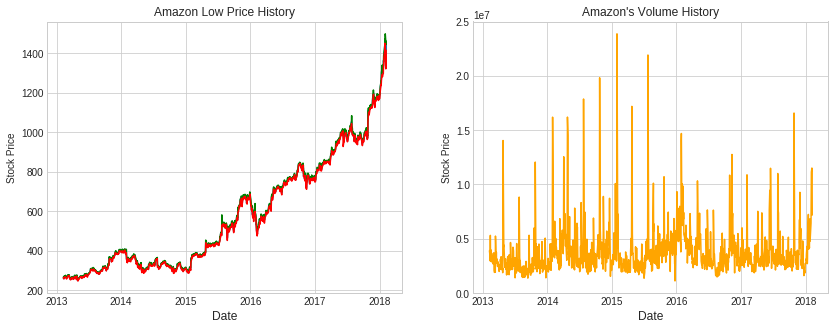

In [10]:
# Simple plotting of Amazon Stock Price
# First Subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(amzn_df["date"], amzn_df["close"])
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Amazon Close Price History")

# Second Subplot
ax1.plot(amzn_df["date"], amzn_df["high"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Amazon High Price History")

# Third Subplot
ax1.plot(amzn_df["date"], amzn_df["low"], color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Amazon Low Price History")

# Fourth Subplot
ax2.plot(amzn_df["date"], amzn_df["volume"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Amazon's Volume History")
plt.show()

This Python code snippet visualizes Amazon's stock price history using the Matplotlib library. In this example, two subplots are generated, placed side by side, displaying the high price, low price, and closing price of the stock.

The first three plots (closing price, high price, and low price) are drawn on the first subplot (ax1), and the fourth plot (trading volume) is drawn on the second subplot (ax2). This code creates a figure (f) with two subplots arranged in a single row and two columns, with a figure size of (14,5).

The code plots the closing price on the first subplot by calling ax1.plot(amzn_df["date"], amzn_df["close"]). After that, it plots the high price and low price on the same subplot using ax1.plot(amzn_df["date"], amzn_df["high"], color="green") and ax1.plot(amzn_df["date"], amzn_df["low"], color="red"). Date is represented by the x-axis, and stock price is represented by the y-axis. With each line displaying a title, an x-axis label, and a y-axis label, the first subplot displays the closing price in blue, the high price in green, and the low price in red.

Ax2.plot(amzn_df["date"], amzn_df["volume"], color="orange") plots the trading volume on the second subplot (ax2). Trading volume is plotted on the y-axis, and the date is plotted on the x-axis. Each subplot has its own title, x-axis label, and y-axis label.

To display the figure with the two subplots, plt.show() is called.

### Prophet Introduction:
Prophet is Facebook's library for time series forecasting. In my opinion, Prophet works best with datasets that are higely influenced by seasonality (electricity bills, restaurant visitors etc.) However, I wanted to show the simplicity of using Prophet for simple forecasting which is the main aim of this kernel.

#### Steps for using Prophet:
<ul>
<li>Make sure you replace closing price for y and date for ds. </li>
<li>Fit that dataframe to Prophet in order to detect future patterns. </li>
<li>Predict the upper and lower prices of the closing price. </li>
</ul>

In [11]:
m = Prophet()

# Drop the columns
ph_df = amzn_df.drop(['open', 'high', 'low','volume', 'Ticks'], axis=1)
ph_df.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)

ph_df.head()

,ds,y
46387,2013-02-08,261.95
46388,2013-02-11,257.21
46389,2013-02-12,258.70
46390,2013-02-13,269.47
46391,2013-02-14,269.24


The code snippet uses the Python library Prophet, which is a time series forecasting library developed by Facebook. This code prepares Amazon stock data for forecasting using the Prophet library and displays the first few rows of the resulting DataFrame.

To begin, a new Prophet object is created and assigned to the variable 'm'. After that, the original Amazon stock data DataFrame 'amzn_df' is modified to retain only the relevant columns for forecasting. The 'open', 'high', 'low', 'volume', and 'Ticks' columns are dropped using the drop function with the axis=1 parameter, which indicates that columns are being dropped.

Following the removal of the unnecessary columns, the remaining DataFrame, now containing only the 'date' and 'close' columns, is renamed to match Prophet's format. 'close' is renamed to 'y', representing the target variable (i.e., the value to be predicted), and 'date' to 'ds', representing the timestamp variable (i.e., the time index). A DataFrame can be directly modified using the rename function with the inplace=True parameter.

Using the Prophet library, we then call the head() function on the modified DataFrame 'ph_df' to display the first few rows of the cleaned data, which now contain only the 'ds' (date) and 'y' (closing price) columns.

In [12]:
m = Prophet()

m.fit(ph_df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Using the Prophet library for time series forecasting, this code snippet builds on the previous one. To fit the Prophet model to the prepared Amazon stock data (stored in 'ph_df'), this code is used.

We begin by creating a new Prophet object and assigning it to the variable 'm'. A new Prophet model instance is created by calling the Prophet() function. This code snippet uses the default settings for these parameters, which can be customized.

Using the prepared DataFrame 'ph_df' as its argument, the fit method is called next on the Prophet object 'm'. In the forecasting process, this step is crucial because it trains the model using historical data. DataFrame 'ph_df' contains time series data with timestamp variable 'ds' (date) and target variable 'y' (closing price).

Prophet learns the underlying patterns, trends, and seasonality in Amazon stock data during the fitting process. Predictions can then be made using this trained model.

The code snippet initializes a Prophet model with default settings, and then it trains the model using historical Amazon stock data (date and closing price) stored in 'ph_df'. Time series forecasting of Amazon's stock can be done using this trained model.

In [13]:
# Create Future dates
future_prices = m.make_future_dataframe(periods=365)

# Predict Prices
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1619,2019-02-03,1781.613591,1192.583877,2330.343027
1620,2019-02-04,1756.431956,1170.927796,2319.385805
1621,2019-02-05,1756.341465,1170.284324,2304.100117
1622,2019-02-06,1756.155910,1163.415818,2314.591202
1623,2019-02-07,1755.620316,1157.903899,2310.648083


Using the Prophet library, this code snippet generates future predictions for Amazon's stock prices using historical data that was previously used to train the model. Using the code, future dates are created, stock prices are predicted for those dates, and the lower and upper confidence intervals are displayed for the forecasted values.

On the trained Prophet model 'm', the make_future_dataframe method is invoked with the parameter periods=365. With this function, 365 days beyond the last date in the original time series data are generated in a new DataFrame. 'future_prices' comprises both historical and future dates (from 'ph_df').

The predict method is then called on the Prophet model 'm' with the 'future_prices' DataFrame as its argument. For all dates in the 'future_prices' DataFrame, this function calculates predicted stock prices (forecasts). A DataFrame named 'forecast' contains columns containing details about the prediction, such as trend components, seasonality, and confidence intervals.

By selecting the 'ds', 'yhat', 'yhat_lower', and 'yhat_upper' columns and calling the tail() function, the code snippet displays the last few rows of the 'forecast' DataFrame. A date is displayed in the 'ds' column, the predicted stock price is shown in the 'yhat' column, the lower confidence interval is shown in the 'yhat_lower' column, and the upper confidence interval is displayed in the 'yhat_upper' column.

This code snippet generates future dates one year in the future, predicts Amazon's stock price using the trained Prophet model, and displays the forecasted values along with lower and upper confidence intervals.

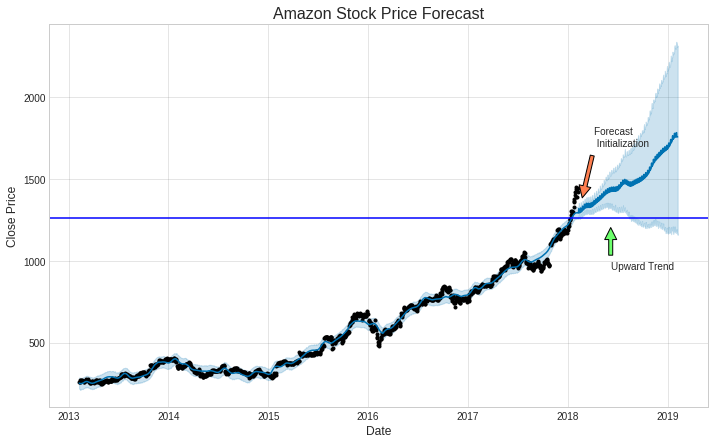

In [14]:
import matplotlib.dates as mdates

# Dates
starting_date = dt.datetime(2018, 4, 7)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2018, 6, 7)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2018, 2, 18)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Learn more Prophet tomorrow and plot the forecast for amazon.
fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Amazon Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

# Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 1350), xytext=(starting_date1,1700),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
            )

# Trend emphasis arrow
ax1.annotate('Upward Trend', xy=(trend_date1, 1225), xytext=(trend_date1,950),
            arrowprops=dict(facecolor='#6cff6c', shrink=0.1),
            )

ax1.axhline(y=1260, color='b', linestyle='-')

plt.show()

The following code snippet uses Matplotlib and Prophet's built-in plotting functionality to create a custom visualization of the Amazon stock price forecast generated in the previous steps. To work with date formatting, the code imports the 'matplotlib.dates' module as 'mdates'.

In the code, several key dates are defined for annotations and reference lines. The 'starting_date' and 'trend_date' variables are set to specific datetime objects, and their numerical representations are calculated using the 'mdates.date2num()' function.

By setting 'pointing_arrow' to another datetime object and obtaining the numerical representation using 'mdates.date2num()', 'pointing_arrow1' is generated.

This code creates a plot of the forecast generated by the Prophet model using the 'm.plot(forecast)' function. Using the 'fig.add_subplot(111)' function, we can add an additional subplot 'ax1' to the figure.

'set_title()', 'set_xlabel()', and 'set_ylabel()' are used to set the subplot's title, x-axis label, and y-axis label.

Annotations are added to the plot to highlight specific points of interest with two arrows. "Forecast Initialization" is labeled on the first arrow. An upward trend is indicated by the second arrow which is labeled "Upward Trend". By using the 'annotate()' function, we can add arrows and their labels, as well as customize the color and size of the arrows.

The 'axhline()' function draws a horizontal reference line with the specified color and linestyle at a specific y-value (1260).

Lastly, the 'plt.show()' function displays the customized forecast visualization, which includes the Amazon stock price forecast, two arrows highlighting specific points of interest, and a horizontal reference line.

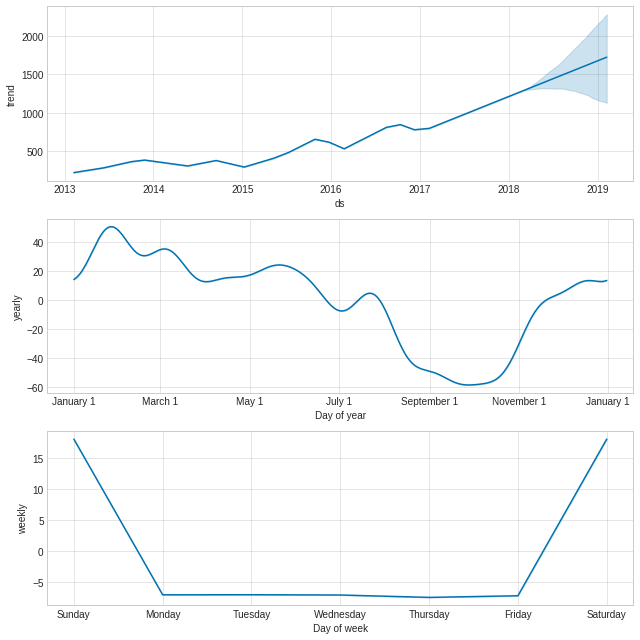

In [15]:
fig2 = m.plot_components(forecast)
plt.show()

To visualize the different components of the Amazon stock price forecast, which were generated in the previous steps, the code snippet uses the Prophet library's plotting functionality. Through this visualization, we can gain insight into the underlying patterns and trends that the model has identified.

With the 'forecast' DataFrame as its argument, the 'm.plot_components(forecast)' function is called on the trained Prophet model 'm'. Using this function, a figure is created with multiple subplots, each representing a different forecast component, such as the overall trend, yearly seasonality, and weekly seasonality. Assign 'fig2' to the resulting figure.

The subplots in the figure provide insight into the different components of the time series data. The trend subplot displays the stock price's overall trend, while the seasonality subplot shows how the price changes over time (e.g., annually, weekly). Decisions can be made based on these components by understanding the underlying factors driving stock price changes.

To display the figure with the subplots of the different forecast components, the 'plt.show()' function is called. An insight into the Amazon stock price's behavior over time can be gained by examining the patterns and trends captured by the Prophet model.

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


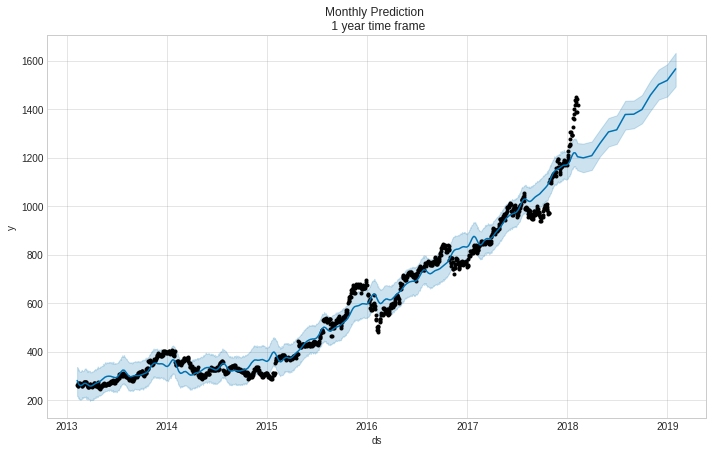

In [16]:
# Monthly Data Predictions
m = Prophet(changepoint_prior_scale=0.01).fit(ph_df)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame")

plt.show()

Using the Prophet library, this code snippet predicts Amazon's stock price for a one-year period. A new model is created, future dates are generated with a monthly frequency, stock prices are predicted, and the results are visualized.

The first step is to create a Prophet object with a custom parameter, 'changepoint_prior_scale', set to 0.01. Lower values result in a less flexible model when adapting to changes in time series data. Using the 'fit()' method, the model is immediately fitted to the prepared DataFrame 'ph_df'.

To generate future dates, the 'make_future_dataframe()' method is called on the trained model 'm'. 'periods' is set to 12 and 'freq' to 'M', indicating that 12 monthly future dates should be generated. DataFrame containing historical and future dates is assigned to variable 'future'.

The 'predict()' method is then called on the model 'm' with the 'future' DataFrame as its argument to calculate the predicted stock prices for all dates. It is then assigned to the variable 'fcst' to represent the forecast DataFrame.

Plot() is called on the model 'm' with the 'fcst' DataFrame as argument to visualize the forecast. A line plot of the predicted stock prices is generated, with historical data colored blue and future predictions colored red. Using 'plt.title()', a custom title is added to the plot and assigned to the variable 'fig'.

In the end, the 'plt.show()' function is called to display the figure, which shows the Prophet model's one-year monthly prediction for Amazon's stock price.

#### Trends:
<ul> 
<li>Amazon's stock price is showing signs of upper trend yearly. </li>
<li> Amazon's stock price show upper trend signs during January (December Sales tend to give a boost to Amazon's stock price)</li>
<li>There is no weekly trend for stock prices. </li>
</ul>

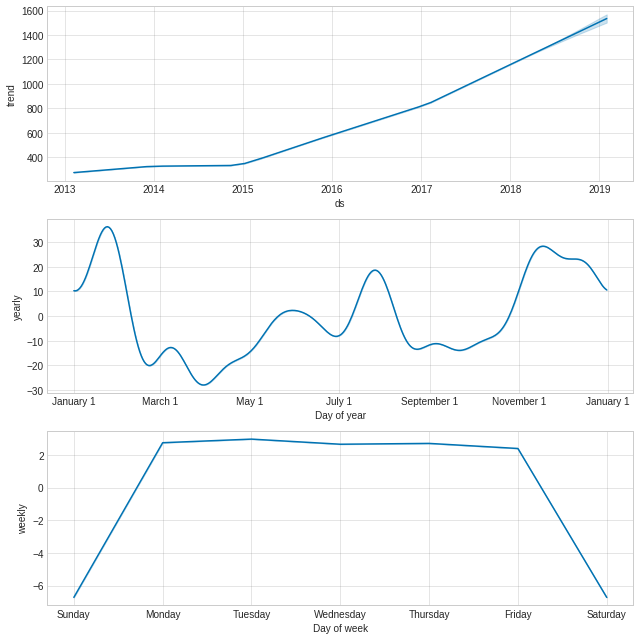

In [17]:
fig = m.plot_components(fcst)
plt.show()

Using the Prophet library's plotting functionality, we can visualize the different components of the Amazon stock price monthly forecast, which were generated previously. Using this visualization, we can see underlying patterns and trends that the model has captured from the data on a monthly basis.

With the 'fcst' DataFrame as its argument, the 'm.plot_components(fcst)' function is called on the trained Prophet model 'm'. Each subplot represents a different component of the forecast, such as the overall trend, the annual seasonality, and the weekly seasonality (if present). 'fig' is assigned to the resulting figure.

On a monthly basis, each subplot in the figure provides insight into the various components of the time series data. Trend subplots show the overall pattern of growth or decline in stock prices, whereas seasonality subplots show how stock prices vary over time (e.g., yearly, weekly). Stock price changes can be understood and informed by understanding these components.

The 'plt.show()' function is used to display the figure with the subplots of the different forecast components. In this visualization, the Prophet model captures patterns and trends in the Amazon stock price data on a monthly basis, offering insights into the stock's behavior over time.

<h2>Technical Analysis: </h2>
In this section we will go into basic technical concepts when dealing with stock investing. This are simple theories however, we shouldn't solely rely on these concepts to maximize profits as it is the case with patterns related to moving averages. Before going into this concepts, I will like to show how OHLC and Candlesticks are interpreted.

<h3 align="center">Open High Low Close (OHLC): </h3>
<img src="https://image.slidesharecdn.com/forexcandlestick-151105160826-lva1-app6892/95/forex-candlestick-5-638.jpg?cb=1446739926" ></img>
<br><br>
<h3 align="center">CandleSticks: </h3>
<img src="http://wealthv.com/learn/actionforex/images/candlestick_charts_explained_1.gif" ></img>
<br><br>
<h3 align="center">Moving Averages: </h3>
<img src="https://commodity.com/wp-content/uploads/technical-analysis/MASimple50200SPY.gif" ></img>

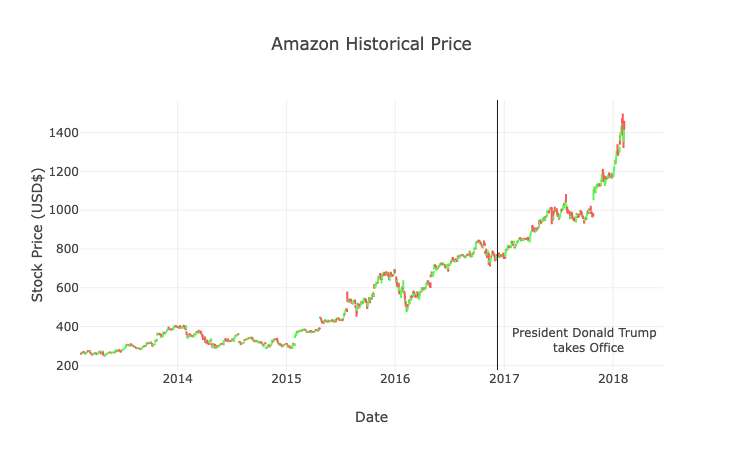

In [18]:
trace = go.Ohlc(x=amzn_df['date'],
                open=amzn_df['open'],
                high=amzn_df['high'],
                low=amzn_df['low'],
                close=amzn_df['close'],
               increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))

layout = {
    'title': 'Amazon Historical Price',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'},
    'shapes': [{
        'x0': '2016-12-09', 'x1': '2016-12-09',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }],
    'annotations': [{
        'x': '2017-01-20', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'President Donald Trump <br> takes Office'
    }]
}

data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple_ohlc')

This code snippet creates an interactive candlestick chart (OHLC) of Amazon's historical stock prices using the Plotly library. Custom styling for increasing and decreasing stock prices and annotations for specific events are included in the chart.

The 'date', 'open', 'high', 'low', and 'close' columns from the 'amzn_df' DataFrame are used to create the 'go.Ohlc()' trace. A specific color ('#58FA58' for increasing and '#FA5858' for decreasing) is assigned to the 'increasing' and 'decreasing' parameters. 'trace' holds the trace.

In the next step, a custom layout is defined and assigned to the variable 'layout'. Chart titles, axis labels, and range sliders on the x-axis have been removed from the layout. An annotation and a vertical line shape are also added to the layout. The line represents a specific date ('2016-12-09') and the annotation describes a historical event (President Donald Trump taking office on '2017-01-20').

The 'trace' is then placed in a list and assigned to the variable 'data'. With the variables 'data' and 'layout', a new 'go.Figure()' object is created, and the resulting figure is assigned to the variable 'fig'.

A filename ('simple_ohlc') and the 'fig' variable are passed to the 'iplot()' function from the Plotly library. Users can explore Amazon's historical stock price data in detail by viewing the interactive candlestick chart, which includes custom styling and annotations.

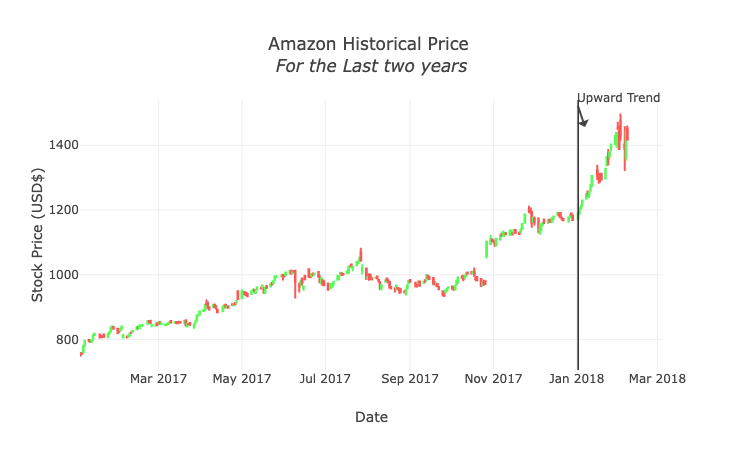

In [19]:
last_two = amzn_df.loc[amzn_df['date'].dt.year > 2016]

g = last_two.groupby(["date"])
monthly_averages = g.aggregate({"open": np.mean, "high": np.mean, "low": np.mean, "close":np.mean})
monthly_averages.reset_index(level=0, inplace=True)

trace = go.Candlestick(x=monthly_averages['date'],
                       open=monthly_averages['open'].values.tolist(),
                       high=monthly_averages['high'].values.tolist(),
                       low=monthly_averages['low'].values.tolist(),
                       close=monthly_averages['close'].values.tolist(),
                      increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))

layout = {
    'title': 'Amazon Historical Price <br> <i>For the Last two years </i>',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'},
    'shapes': [{
        'x0': '2018-01-02', 'x1': '2018-01-02',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }],
    'annotations': [{
        'x': '2018-01-07', 'y': 0.9, 'xref': 'x', 'yref': 'paper',
        'showarrow': True, 'xanchor': 'left',
        'text': 'Upward Trend'
    }]
}


data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple_ohlc')

In this code snippet, we create an interactive candlestick chart of Amazon's historical stock prices for the last two years (since 2016) using monthly average prices. There is custom styling for increasing and decreasing stock prices, as well as annotations for specific events.

The 'amzn_df' DataFrame is first filtered to include only rows with a 'date' greater than 2016. 'last_two' contains the filtered DataFrame. The data is then grouped by 'date' using the 'groupby()' method, and the resulting groups are aggregated to calculate the mean of 'open', 'high', 'low', and 'close' columns. 'monthly_averages' is assigned to the aggregated DataFrame, and the index is reset.

The 'date', 'open', 'high', 'low', and 'close' columns from the 'monthly_averages' DataFrame are then used to create a 'go.Candlestick()' trace. With the 'increasing' and 'decreasing' parameters, custom colors can be applied to increasing and decreasing candlestick lines. Trace is assigned to the variable 'trace'.

Layout is defined and assigned to the variable 'layout'. On the x-axis, the 'rangeslider' on the y-axis has been removed, along with the title for the chart. An annotation and a vertical line shape are also added to the layout. Lines represent specific dates ('2018-01-02'), and annotations contain text relating to stock price trends ('Upward Trend').

Next, the variable 'data' is assigned the 'trace' inside a list. The 'data' and 'layout' variables are used to create a 'go.Figure()' object, and the resulting figure is assigned to the variable 'fig'.

With 'fig' and 'simple_ohlc' as arguments, the Plotly library's 'iplot()' function is called. Amazon's historical stock prices over the last two years are displayed using the interactive candlestick chart, which includes custom styling, annotations, and monthly average prices.

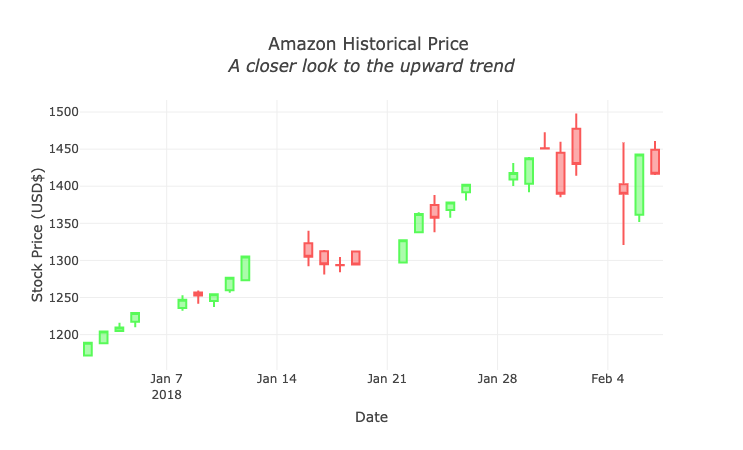

In [20]:
amzn_df['month_year'] = pd.to_datetime(amzn_df['date']).dt.to_period('M')

# 2017 onwards
last_year = amzn_df.loc[amzn_df['date'].dt.year > 2017]
g = last_year.groupby(["date"])
monthly_averages = g.aggregate({"open": np.mean, "high": np.mean, "low": np.mean, "close":np.mean})
monthly_averages.reset_index(level=0, inplace=True)

monthly_averages.dtypes


trace = go.Candlestick(x=monthly_averages['date'],
                       open=monthly_averages['open'].values.tolist(),
                       high=monthly_averages['high'].values.tolist(),
                       low=monthly_averages['low'].values.tolist(),
                       close=monthly_averages['close'].values.tolist(),
                      increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))


layout = {
    'title': 'Amazon Historical Price <br> <i>A closer look to the upward trend </i>',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'}
}


data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple_ohlc')

Using the Plotly library, this code snippet creates an interactive candlestick chart of Amazon's historical stock prices from 2017 onward, highlighting the upward trend. As the stock price increases and decreases, the chart will be styled accordingly.

By converting the 'date' column to a datetime object and extracting the month and year as a period object, a new column 'month_year' is added to the 'amzn_df' DataFrame. The new column will be used to group the data by month and year.

As a next step, the 'amzn_df' DataFrame is filtered to include only rows whose 'date' is greater than 2017. A variable 'last_year' is created from the filtered DataFrame. Using the groupby() method, the data is grouped by 'date', and the resulting groups are aggregated to calculate the mean of the 'open', 'high', 'low', and 'close' columns. DataFrames are aggregated and assigned to the variable 'monthly_averages'.

From the 'monthly_averages' DataFrame, the 'date', the 'open', the 'high', the 'low', and the 'close' columns are used to generate a 'go.Candlestick()' trace. With the 'increasing' and 'decreasing' parameters, custom colors are applied to increasing and decreasing candlestick lines. Variable 'trace' contains the trace.

In this case, a custom layout is defined and assigned to the variable 'layout'. The layout contains a chart title, axis labels, and the 'rangeslider' on the x-axis has been removed. There is a focus on the upward trend in the title.

A list is created for the variable 'data' and the variable 'trace' is placed inside it. In order to create the figure, a new 'go.Figure()' object is created using the 'data' and 'layout' variables.

A file name ('simple_ohlc') and the 'fig' variable are passed to the 'iplot()' function from the Plotly library. Based on Amazon's historical stock prices from 2017 onward, this function displays the interactive candlestick chart that emphasizes the upward trend.



In [21]:
amzn_df.head()

,date,open,high,low,close,volume,Ticks,month_year
46387,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,2013-02
46388,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,2013-02
46389,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,2013-02
46390,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,2013-02
46391,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,2013-02


In [22]:
# Moving Averages (10, 50 and 200)
amzn_df['10_d_avg'] = amzn_df.close.rolling(window=10).mean()
amzn_df['50_d_avg'] = amzn_df.close.rolling(window=50).mean()
amzn_df['200_d_avg'] = amzn_df.close.rolling(window=200).mean()
close_p = amzn_df['close'].values.tolist()


# Variables to insert into plotly
ten_d = amzn_df['10_d_avg'].values.tolist()
fifty_d = amzn_df['50_d_avg'].values.tolist()
twoh_d = amzn_df['200_d_avg'].values.tolist()
date = amzn_df['date'].values.tolist()

# Set date as index
amzn_df = amzn_df.set_index('date')

In this code snippet, the 10-day, 50-day, and 200-day moving averages of Amazon's historical stock prices are calculated and added to the 'amzn_df' DataFrame.

First, the 'rolling()' method is applied to the 'close' column of the 'amzn_df' DataFrame with window sizes of 10, 50, and 200. On each rolling window, the 'mean()' method is called to calculate the moving averages. A new column with the names '10_d_avg', '50_d_avg', and '200_d_avg' has been added to the 'amzn_df' DataFrame.

A list is then created from the 'close' column of the 'amzn_df' DataFrame and assigned to the variable 'close_p'. As well, the columns 'ten_d', 'fifty_d', and 'twoh_d' are converted to lists and assigned to the variables 'ten_d', 'fifty_d', and 'twoh_d', respectively. Assign the variable 'date' to the 'date' column as well.

The 'amzn_df' DataFrame is set to have 'date' as its index using the 'set_index()' method. In subsequent analysis or plotting, this makes indexing and slicing data easier based on dates.

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]



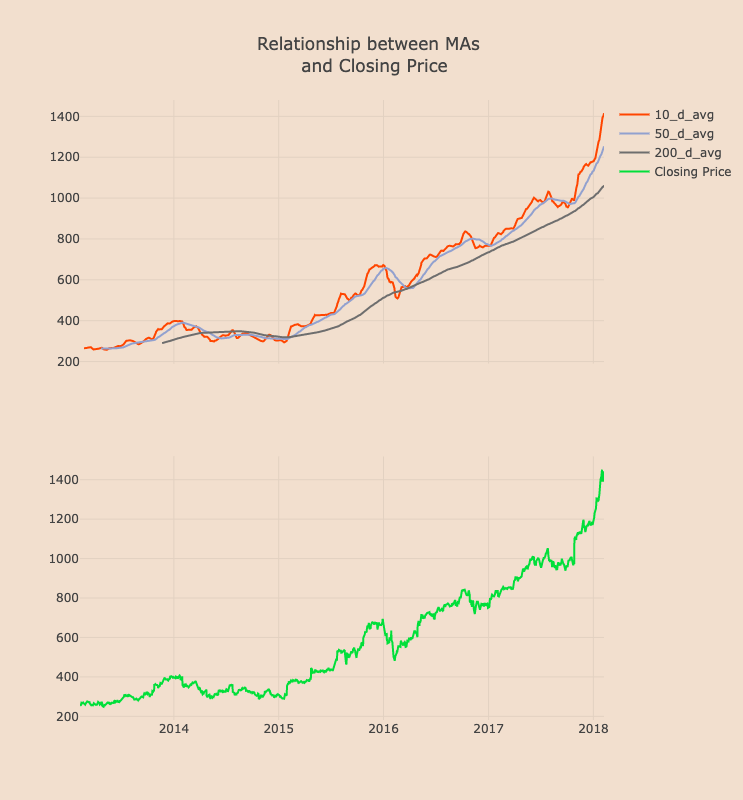

In [23]:
fig = tls.make_subplots(rows=2, cols=1, shared_xaxes=True)

colors = ['#ff4500', '#92a1cf', '#6E6E6E']
avgs = ['10_d_avg', '50_d_avg', '200_d_avg']
# for i,c in zip(range(n),color):
#    ax1.plot(x, y,c=c)

for col, c in zip(avgs, colors):
    fig.append_trace({'x': amzn_df.index, 'y': amzn_df[col], 'type': 'scatter', 'name': col, 'line': {'color': c}}, 1, 1)
for col in ['close']:
    fig.append_trace({'x': amzn_df.index, 'y': amzn_df[col], 'type': 'scatter', 'name': 'Closing Price', 'line':{'color': '#01DF3A'}}, 2, 1)
    
fig['layout'].update(height=800,title='Relationship between MAs <br> and Closing Price',
                    paper_bgcolor='#F2DFCE', plot_bgcolor='#F2DFCE')
    
iplot(fig, filename='pandas/mixed-type subplots')

With this code snippet, two vertically stacked subplots share the same x-axis in a Plotly subplot figure. Amazon's 10-day, 50-day, and 200-day moving averages are displayed on the top subplot, and its closing prices appear on the bottom subplot.

In order to create a 2-row, 1-column subplot grid, the function 'tls.make_subplots()' is called with the parameters 'rows=2' and 'cols=1'. A shared x-axis (dates) is ensured by the 'shared_xaxes=True' parameter. 'fig' is the variable containing the resulting figure.

The 'colors' list defines three colors, and the 'avgs' list specifies the moving average column names. Each moving average's scatter trace is appended to the top subplot (1, 1) by using the corresponding color from the 'colors' list. The 'x' values for the traces represent the index of the 'amzn_df' DataFrame (dates), and the 'y' values represent the moving average.

Another 'for' loop is added to the bottom subplot (2, 1) to add a scatter plot for the closing prices, with the same 'x' values (dates) and 'y' values set to the 'close' column values of the 'amzn_df' DataFrame. #01DF3A is the line color for the closing price trace.

It is then updated using the 'update()' method. It has a height of 800, a title of 'Relationship between MAs and Closing Price', and a color of '#F2DFCE' for the paper background and plot background.

A filename ('pandas/mixed-type subplots') and a variable name ('fig') are passed to the 'iplot()' function. It displays an interactive subplot showing the relationship between Amazon's historical stock prices and moving averages.

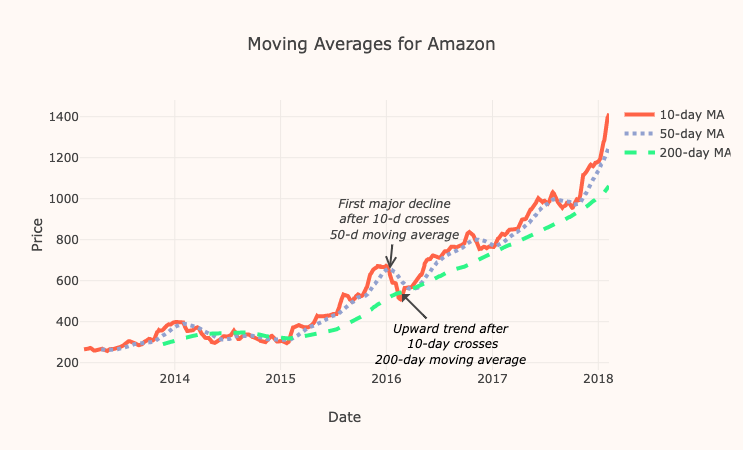

In [24]:
# Take off the date index
amzn_df = amzn_df.reset_index()

# Plotly
trace0 = go.Scatter(
    x = amzn_df['date'],
    y = ten_d,
    name = '10-day MA',
    line = dict(
        color = ('#ff6347'),
        width = 4)
)
trace1 = go.Scatter(
    x = amzn_df['date'],
    y = fifty_d,
    name = '50-day MA',
    line = dict(
        color = ('#92a1cf'),
        width = 4,
    dash="dot")
)
trace2 = go.Scatter(
    x = amzn_df['date'],
    y = twoh_d,
    name = '200-day MA',
    line = dict(
        color = ('#2EF688'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)

data = [trace0, trace1, trace2]


# Edit the layout
layout = dict(title = 'Moving Averages for Amazon',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'),
              annotations=[
        dict(
            x='2016-01-13',
            y=657,
            xref='x',
            yref='y',
            text='<i> First major decline <br> after 10-d crosses <br> 50-d moving average </i>',
            showarrow=True,
            arrowhead=5,
            ax=5,
            ay=-50
        ), dict(
        x = "2016-02-24",
        y = 535,
        text = "<i>Upward trend after <br> 10-day crosses <br>200-day moving average </i>",
        textangle = 0,
        ax = 50,
        ay = 50,
        font = dict(
          color = "black",
          size = 12
        )
        )],
              paper_bgcolor='#FFF9F5',
              plot_bgcolor='#FFF9F5'
              )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-line')

With this code, Amazon's historical stock prices are visualized in an interactive line chart using Plotly's 10-day, 50-day, and 200-day moving averages.

The first step is to reset the date index of the 'amzn_df' DataFrame. Three 'go.Scatter()' objects are created, each representing a different moving average (10-day, 50-day, and 200-day) with varying line colors, widths, and styles. 'trace0', 'trace1', and 'trace2' are assigned to these scatter objects.

Each trace has a 'x' value that represents the dates from the 'amzn_df' DataFrame, and a 'y' value that represents the moving average values from the 'ten_d', 'fifty_d', and 'twoh_d' lists.

The traces are then combined into a single list called 'data'. A dictionary is used to define the title, axis labels, annotations, and background colors of the chart. To highlight specific events in the stock price history, two annotations are added to the chart. The first annotation points to the first major decline after the 10-day moving average crosses the 50-day moving average, and the second annotation indicates an upward trend when the 10-day moving average crosses the 200-day moving average.

A 'fig' dictionary containing both 'data' and 'layout' is then created. As arguments, the 'iplot()' function receives the 'fig' dictionary and a filename ('styled-line'). The line chart in this function displays the moving averages of Amazon's historical stock prices and highlights significant events in the company's history.

In [25]:
# American Airlines
aal_df = df.loc[df["Ticks"] == "AAL"]

aal_df.loc[:, 'date'] = pd.to_datetime(aal_df.loc[:,'date'], format="%Y/%m/%d")

aal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1258
Data columns (total 7 columns):
date      1259 non-null datetime64[ns]
open      1259 non-null float64
high      1259 non-null float64
low       1259 non-null float64
close     1259 non-null float64
volume    1259 non-null int64
Ticks     1259 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 78.7+ KB


The code filters the original DataFrame to obtain data specifically for American Airlines (ticker symbol "AAL") and formats the 'date' column as a datetime object.

The code selects only rows where the 'Ticks' column equals "AAL" from the DataFrame 'df', and assigns the resulting DataFrame to the variable 'aal_df'. By doing this, the data is narrowed down to only include information about American Airlines.

Using the 'pd.to_datetime()' function, the 'date' column in 'aal_df' is converted to pandas datetime format. The 'format' parameter specifies the input format for date strings ("%Y/%m/%d"). In 'aal_df', the converted 'date' column replaces the original 'date' column.

The 'info()' method is called on 'aal_df' to display summary information about the DataFrame, including the number of non-null values in each column and their respective data types. American Airlines data has been filtered and formatted to provide a quick overview.

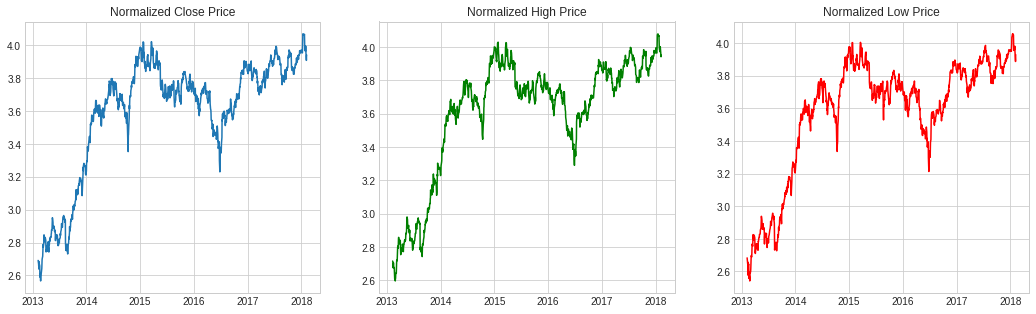

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))

aal_df["close_log"] = np.log(aal_df["close"])
aal_df["high_log"] = np.log(aal_df["high"])
aal_df["low_log"] = np.log(aal_df["low"])

ax1.plot(aal_df["date"], aal_df["close_log"])
ax1.set_title("Normalized Close Price")
ax2.plot(aal_df["date"], aal_df["high_log"], color="g")
ax2.set_title("Normalized High Price")
ax3.plot(aal_df["date"], aal_df["low_log"], color="r")
ax3.set_title("Normalized Low Price")
plt.show()

With this code, you can create a single figure with three side-by-side line plots displaying the normalized close, high, and low prices of American Airlines stock. Prices are normalized by taking their natural logarithm.

We create three new columns in the 'aal_df' DataFrame: 'close_log', 'high_log', and 'low_log'. The 'np.log()' function is used to calculate the natural logarithm of the prices ('close', 'high', and 'low').

Using 'plt.subplots()', a new figure is created with three subplots (ax1, ax2, and ax3). There will be one row and three columns of subplots, and 'figsize=(18, 5)' specifies the overall figure dimensions.

Using the data in the 'date' column, the code plots each subplot's normalized price:

The blue line represents the normalized close price ('close_log')

High price normalized ('high_log') in green

The normalized low price ('low_log') is shown in red in ax3

A title is also given to each subplot to indicate what type of price is being displayed. As a final step, 'plt.show()' is called to render the figure with the three line plots displayed together.

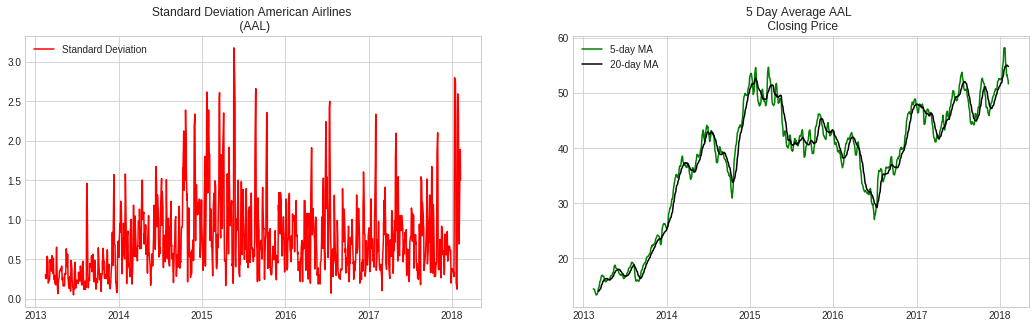

In [27]:
aal_df['std_close'] = aal_df["close"].rolling(5).std()
aal_df['mean_close'] = aal_df["close"].rolling(5).mean()
aal_df['twenty_mean_close'] = aal_df["close"].rolling(20).mean()

f, (std_ax, avg_ax) = plt.subplots(1, 2, figsize=(18,5))

std_ax.plot(aal_df["date"], aal_df["std_close"], color="r", label="Standard Deviation")
std_ax.legend(loc="upper left")
std_ax.set_title("Standard Deviation American Airlines \n (AAL)")

avg_ax.plot(aal_df["date"], aal_df["mean_close"], color="g", label="5-day MA")
avg_ax.plot(aal_df["date"], aal_df["twenty_mean_close"], color="k", label="20-day MA")
avg_ax.legend(loc="upper left")
avg_ax.set_title("5 Day Average AAL \n Closing Price")
plt.show()

A single figure is created with two side-by-side line plots displaying the rolling standard deviation and moving average of American Airlines' closing price.

In the 'aal_df' DataFrame, three new columns are added:

'std_close': 5-day rolling standard deviation of the 'close' column

'mean_close': 5-day rolling mean of the 'close' column

'twenty_mean_close': 20-day rolling mean of the 'close' column

Calculations are performed using the 'rolling()' function followed by either the 'std()' or 'mean()' functions.

In the next step, a new figure with two subplots (std_ax and avg_ax) is created using 'plt.subplots()'. The arguments (1, 2) indicate that there will be one row and two columns of subplots, and 'figsize=(18, 5)' specifies the size of the entire figure.

A subplot is plotted against a 'date' column for each calculated value:

The 5-day rolling standard deviation of the closing price ('std_close') is shown in red

Green and black, respectively, are the 5-day and 20-day rolling means of the closing price ('mean_close' and 'twenty_mean_close').

To specify the labels for the plotted lines, a legend is added using 'legend()' to each subplot, indicating the type of data being displayed. To render the figure with the two line plots side-by-side, 'plt.show()' is called.

In [28]:
m = Prophet()

# Drop the columns
ph_df = aal_df.drop(['open', 'high', 'low','volume', 'Ticks', 'close_log', 'high_log', 'mean_close', 'twenty_mean_close', 'low_log', 'std_close'], axis=1)
ph_df.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)

ph_df.head()



,ds,y
0,2013-02-08,14.75
1,2013-02-11,14.46
2,2013-02-12,14.27
3,2013-02-13,14.66
4,2013-02-14,13.99


The code prepares the American Airlines stock data in 'aal_df' for time series forecasting using Facebook's Prophet library by creating a new DataFrame 'ph_df' with only the relevant columns.

In order to create an instance of the Prophet model, call Prophet() and assign 'm' to it.

By dropping unnecessary columns from 'aal_df', the code creates a new DataFrame 'ph_df'. 'drop()' is called with a list of column names to be removed, and 'axis=1' specifies that columns are being dropped.

The 'rename()' function is then used to rename the 'close' column to 'y' and the 'date' column to 'ds', as required by Prophet. Using the 'inplace=True' argument ensures that the changes are made directly to the DataFrame without having to create a new one.

The 'head()' function displays the first few rows of the 'ph_df' DataFrame, which now contains only the 'ds' (date) and 'y' (closing price) columns, ready for Prophet time series forecasting.

In [29]:
m.fit(ph_df)

future_prices = m.make_future_dataframe(periods=365)

# Predict Prices
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
1619,2019-02-03,64.312475,56.755132,72.371437
1620,2019-02-04,62.517533,54.965993,71.153621
1621,2019-02-05,62.510965,54.396513,70.924456
1622,2019-02-06,62.555272,55.077585,71.060240
1623,2019-02-07,62.535825,54.694537,70.955502


Using the Facebook Prophet library, this code predicts future stock prices for American Airlines using time series forecasting.

As a first step, the 'fit()' function is called on the Prophet model instance 'm' with the DataFrame 'ph_df' as its argument. Based on the historical stock data contained in 'ph_df', which include the date and closing price, the model is fitted.

On the fitted model 'm', the 'make_future_dataframe()' function is called with 'periods=365' as its argument. In this function, a new DataFrame 'future_prices' is generated that includes the original dates in 'ph_df' and extends them by 365 days.

On the model 'm', the 'predict()' function is called with the 'future_prices' DataFrame as its argument. The function returns a new DataFrame 'forecast' containing the predicted values along with their lower and upper confidence bounds for the entire range of dates in 'future_prices'.

The 'tail()' function is then called on the 'forecast' DataFrame, subsetting it to only include the columns 'ds' (date), 'yhat' (predicted value), 'yhat_lower' (lower confidence bound), and 'yhat_upper' (upper confidence bound). For the final days of the forecast period, the 'tail()' function displays the predicted stock prices and their confidence intervals.

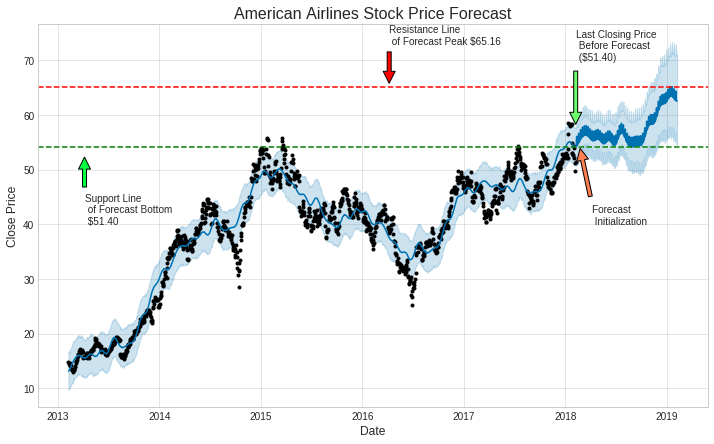

In [30]:
# Dates
starting_date = dt.datetime(2018, 4, 7)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2018, 2, 7)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2018, 2, 18)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Dates Forecasting Resistance Line
resistance_date = dt.datetime(2016, 4, 7)
resistance_date1 = mdates.date2num(resistance_date)

# Dates Forecasting Support Line
support_date = dt.datetime(2013, 4, 7)
support_date1 = mdates.date2num(support_date)

# Learn more Prophet tomorrow and plot the forecast for amazon.
fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("American Airlines Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

# Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 55), xytext=(starting_date1,40),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
            )

# # Trend emphasis arrow
ax1.annotate('Last Closing Price \n Before Forecast \n ($51.40)', xy=(trend_date1, 57), xytext=(trend_date1,70),
            arrowprops=dict(facecolor='#6cff6c', shrink=0.1),
            )

# Resistance Line
ax1.annotate('Resistance Line \n of Forecast Peak ${:.2f}'.format(forecast["yhat"].max()), xy=(resistance_date1, 65), xytext=(resistance_date1,73),
            arrowprops=dict(facecolor='#FF0000', shrink=0.1),
            )

# Support Line
ax1.annotate('Support Line \n of Forecast Bottom \n $51.40', xy=(support_date1, 53), xytext=(support_date1,40),
            arrowprops=dict(facecolor='#00FF40', shrink=0.1),
            )

ax1.axhline(y=65, color='r', linestyle='--')
ax1.axhline(y=54.2, color='g', linestyle='--')

plt.show()

By using the fitted Prophet model, this code snippet generates a plot of the forecasted American Airlines stock prices and customizes the plot with additional annotations and lines to emphasize specific aspects.

The starting date of the forecast, the last closing price date before the forecast, the pointing arrow date, the resistance line date, and the support line date are defined and converted to numeric values for annotating the plot.

The forecast plot is generated by calling the 'plot()' function on the Prophet model 'm' with the 'forecast' DataFrame as its argument. A plot of historical and predicted stock prices is created.

These lines of code create a subplot and customize its title, x-axis label, and y-axis label.

To highlight the forecast initialization, the last closing price before the forecast, the resistance line (forecast peak), and the support line (forecast bottom), the 'annotate()' function is used to add several arrows and text annotations to the plot.

To represent resistance and support lines, the plot is drawn with the 'axhline()' function. Support lines are drawn at the lowest predicted value (bottom) of the forecast, while resistance lines are drawn at the highest predicted value (peak).

To display the customized plot with all annotations and lines added, the 'plt.show()' function is called.

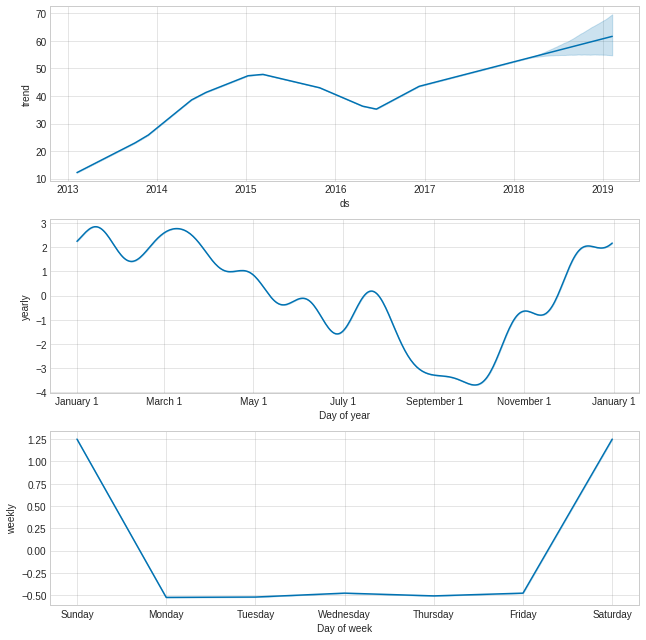

In [31]:
fig2 = m.plot_components(forecast)
plt.show()

Based on the fitted Prophet model, this code snippet generates a plot of the forecasted American Airlines stock prices. It is called with the 'forecast' DataFrame as its argument on the fitted Prophet model 'm'.

Plot_components() creates a plot that breaks down the forecast into its various components, such as the overall trend, the annual seasonality, and the weekly seasonality (if applicable). As a result, the underlying patterns and trends in the data can be analyzed more in depth.

Lastly, the plot with individual forecast components is displayed using the 'plt.show()' function. By doing so, users are able to visualize and understand the contributing factors to the overall forecasted stock price.

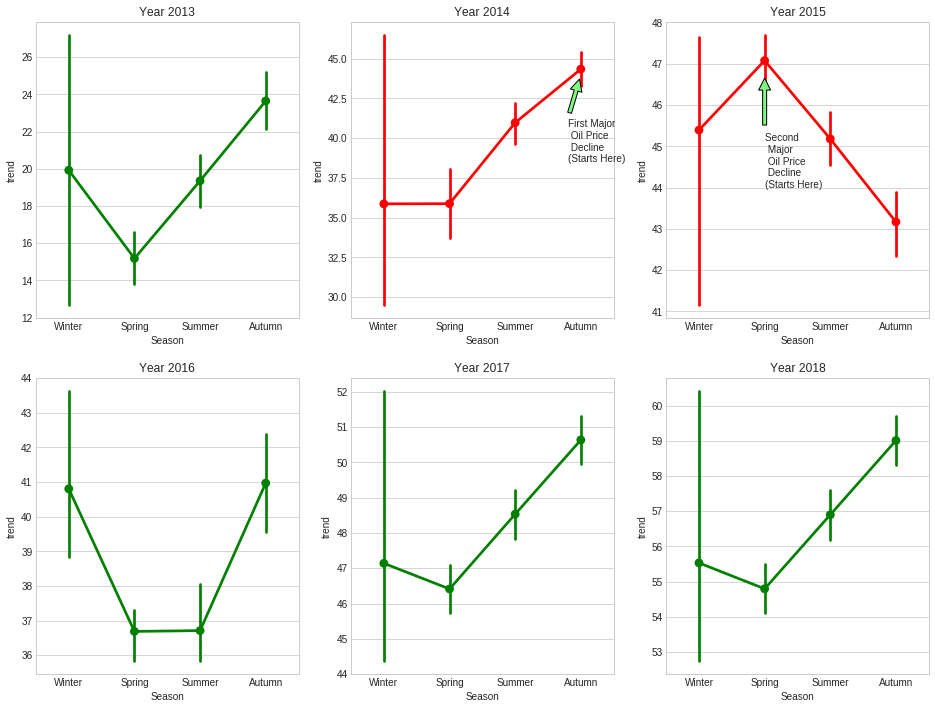

In [32]:
# Change dates from daily frequency to monthly frequency
forecast_monthly = forecast.resample('M', on='ds').mean()
forecast_monthly = forecast_monthly.reset_index() 


# Extract Year and Month and put it in a column.
forecast_monthly["month_int"] = forecast_monthly['ds'].dt.month
forecast_monthly["year"] = forecast_monthly['ds'].dt.year

forecast_monthly["month"] = np.nan
lst = [forecast_monthly]


for column in lst:
    column.loc[column["month_int"] == 1, "month"] = "January"
    column.loc[column["month_int"] == 2, "month"] = "February"
    column.loc[column["month_int"] == 3, "month"] = "March"
    column.loc[column["month_int"] == 4, "month"] = "April"
    column.loc[column["month_int"] == 5, "month"] = "May"
    column.loc[column["month_int"] == 6, "month"] = "June"
    column.loc[column["month_int"] == 7, "month"] = "July"
    column.loc[column["month_int"] == 8, "month"] = "August"
    column.loc[column["month_int"] == 9, "month"] = "September"
    column.loc[column["month_int"] == 10, "month"] = "October"
    column.loc[column["month_int"] == 11, "month"] = "November"
    column.loc[column["month_int"] == 12, "month"] = "December"
    
    
forecast_monthly['season'] = np.nan
lst2 = [forecast_monthly]

for column in lst2:
    column.loc[(column['month_int'] > 2) & (column['month_int'] <= 5), 'Season'] = 'Spring'
    column.loc[(column['month_int'] > 5) & (column['month_int'] <= 8), 'Season'] = 'Summer'
    column.loc[(column['month_int'] > 8) & (column['month_int'] <= 11), 'Season'] = 'Autumn'
    column.loc[column['month_int'] <= 2, 'Season'] = 'Winter'
    column.loc[column['month_int'] == 12, 'Season'] = 'Winter'
    
    

    

# Let's Create Seasonality Columns (Barplots that descripe the average trend per Season for each year)
# Create different axes by Year
df_2013 = forecast_monthly.loc[(forecast_monthly["year"] == 2013)]
df_2014 = forecast_monthly.loc[(forecast_monthly["year"] == 2014)]
df_2015 = forecast_monthly.loc[(forecast_monthly["year"] == 2015)]
df_2016 = forecast_monthly.loc[(forecast_monthly["year"] == 2016)]
df_2017 = forecast_monthly.loc[(forecast_monthly["year"] == 2017)]
df_2018 = forecast_monthly.loc[(forecast_monthly["year"] == 2018)]


f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(16,12))


# Year 2013
sns.pointplot(x="Season", y="trend",
                    data=df_2013, ax=ax1, color="g")

# Year 2014
sns.pointplot(x="Season", y="trend",
                    data=df_2014, ax=ax2, color="r")

# Year 2015
sns.pointplot(x="Season", y="trend",
                    data=df_2015, ax=ax3, color="r")


# Year 2016
sns.pointplot(x="Season", y="trend",
                    data=df_2016, ax=ax4, color="g")

# Year 2017
sns.pointplot(x="Season", y="trend",
                    data=df_2017, ax=ax5, color="g")

# Year 2018
sns.pointplot(x="Season", y="trend",
                    data=df_2018, ax=ax6, color="g")

ax1.set_title("Year 2013")
ax2.set_title("Year 2014")
ax3.set_title("Year 2015")
ax4.set_title("Year 2016")
ax5.set_title("Year 2017")
ax6.set_title("Year 2018")

# Oil dips
# September 2014 and June 2015
ax2.annotate('First Major \n Oil Price \n Decline \n(Starts Here)', xy=(3, 44), xytext=(2.8,38.5),
            arrowprops=dict(facecolor='#81F781', shrink=0.1),
            )


ax3.annotate('Second \n Major \n Oil Price \n Decline \n(Starts Here)', xy=(1, 46.8), xytext=(1,44),
            arrowprops=dict(facecolor='#81F781', shrink=0.1),
            )

plt.show()

By taking the mean of the daily values for each month, this code snippet first resamples the daily forecasted stock prices to monthly frequency. After extracting the month and year from the date, it maps the month integers to their names. Based on the month integer, it assigns each month a season (Winter, Spring, Summer, or Autumn).

The code filters the resampled forecasted data into separate DataFrames for each year (2013-2018). A 2x3 subplot grid is created with each plot representing a different year. Based on the forecast values, a point plot is created within each plot to visualize the average trend per season for each year.

Additionally, the code includes annotations highlighting specific events, such as the major declines in oil prices in September 2014 and June 2015. The annotations provide more context for the seasonal trends shown in the plots.

It enables users to understand how the stock prices of American Airlines have been affected by different seasons and external factors such as oil price fluctuations using a detailed seasonal trend analysis.



<h3>References: </h3>
<a src="https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series"> Everything you can do with a time series </a> by Siddharth Yadav 
- A special thanks to Siddharth for publishing an amazing work in the Kaggle community. Definitely, will recommend his work for anyone interested in Time Series Forecasting.